# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech



*   Nama: Muhammad Raihan Rifki Asdhar
*   Email: muhammadraihanrifki973@gmail.com
*   Id Dicoding: raihanrifki





## Persiapan

Meyiapkan library yang dibutuhkan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

Menyiapkan data yang akan digunakan

In [148]:
url = "https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/refs/heads/main/students_performance/data.csv"
df = pd.read_csv(url, sep=';')

In [149]:
df.head(10)

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
5,2,39,1,9991,0,19,133.1,1,37,37,...,0,5,17,5,11.500000,5,16.2,0.3,-0.92,Graduate
6,1,1,1,9500,1,1,142.0,1,19,38,...,0,8,8,8,14.345000,0,15.5,2.8,-4.06,Graduate
7,1,18,4,9254,1,1,119.0,1,37,37,...,0,5,5,0,0.000000,0,15.5,2.8,-4.06,Dropout
8,1,1,3,9238,1,1,137.0,62,1,1,...,0,6,7,6,14.142857,0,16.2,0.3,-0.92,Graduate
9,1,1,1,9238,1,1,138.0,1,1,19,...,0,6,14,2,13.500000,0,8.9,1.4,3.51,Dropout


# Data Understanding

Menampilkan informasi umum dataset

In [150]:
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

,0
Marital_status,0
Application_mode,0
Application_order,0
Course,0
Daytime_evening_attendance,0
Previous_qualification,0
Previous_qualification_grade,0
Nacionality,0
Mothers_qualification,0
Fathers_qualification,0


Insight: Terdapat 3 jenis data Interger, Float, dan 1 bertipe object "Status" serta tidak ditemukan missing value (float64(7), int64(29), object(1)). Dataset terdiri dari 36 kolom dan 4424 baris.

Distribusi label "status"

In [151]:
df['Status'].value_counts()

,count
Status,
Graduate,2209
Dropout,1421
Enrolled,794


Insight: terdapat 3 label pada fitur "status" dengan yang terbanyak pada label graduate dengan sekitar 2209 baris data,

Distribusi fitur numerik

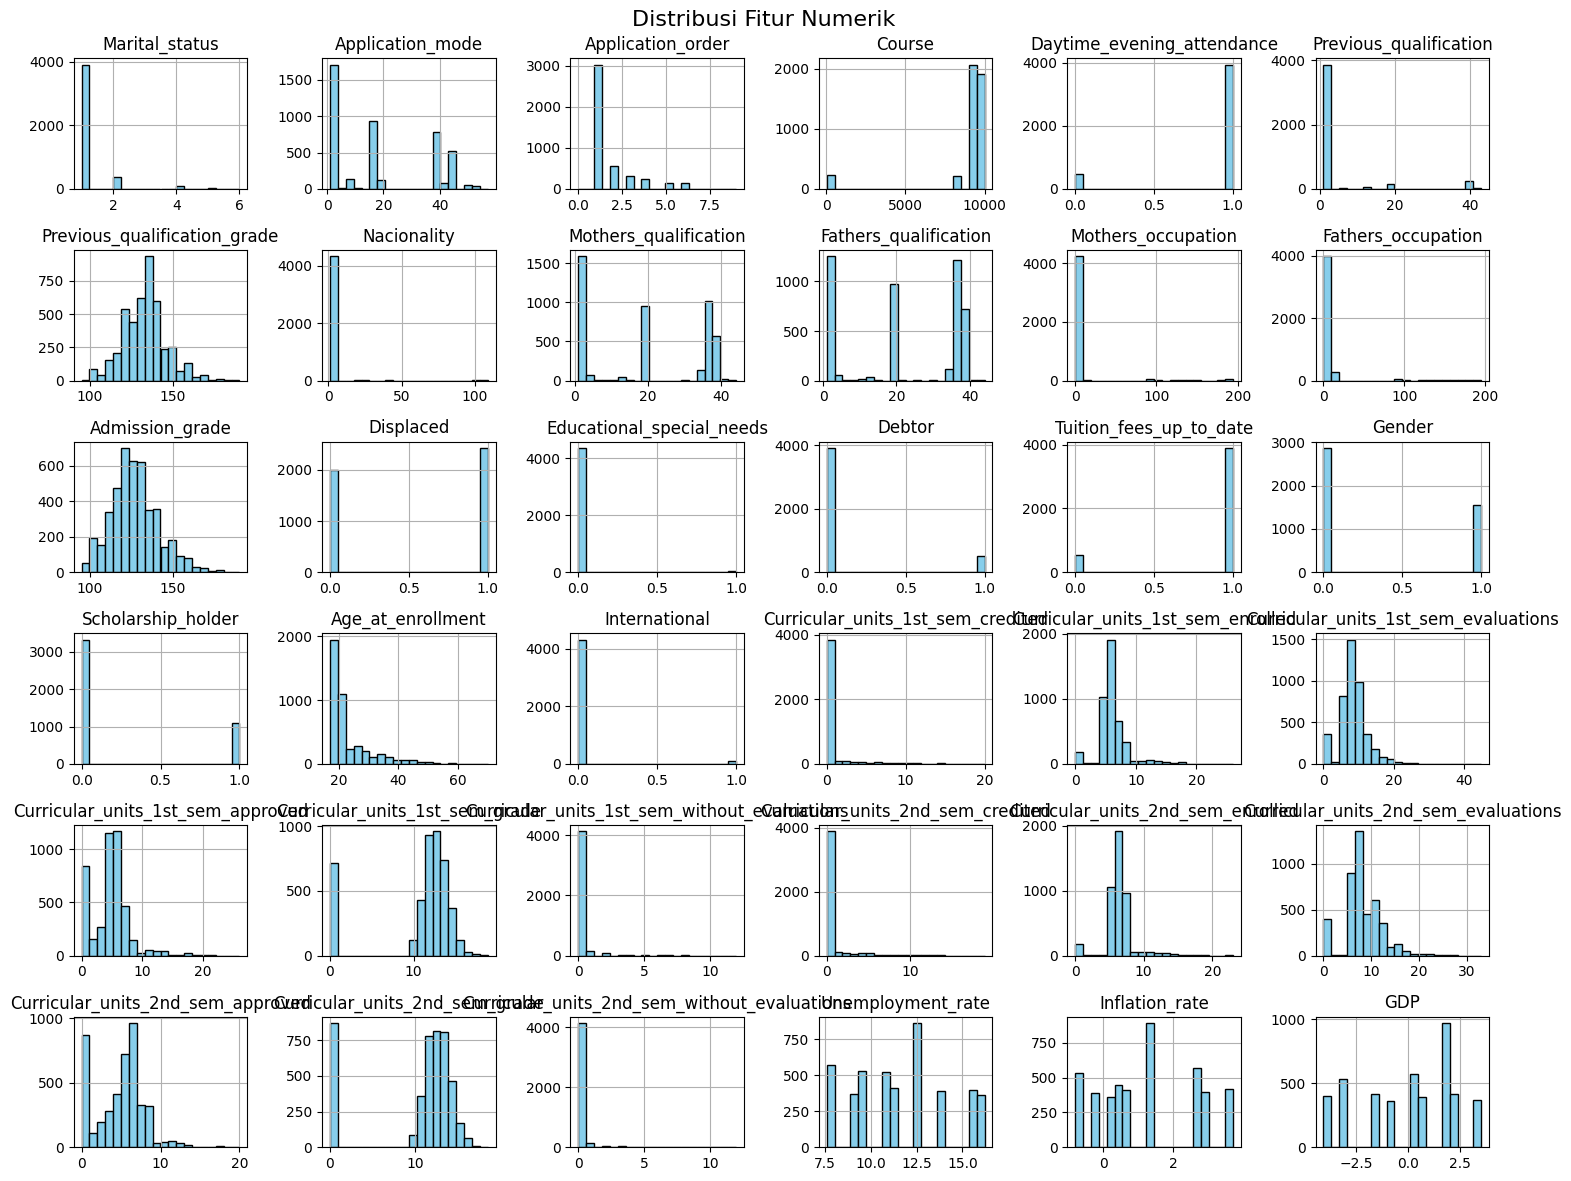

In [152]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

df[num_cols].hist(figsize=(15, 12), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Distribusi Fitur Numerik", fontsize=16)
plt.tight_layout()
plt.show()


Insight: terlihat penyebaran data pada fitur numerik berbeda2 penyebarannya. Terdapat fitur yang penyebarannya merata, sampai yang dominan hanya pada satu rentang nilai.

Matriks korelasi

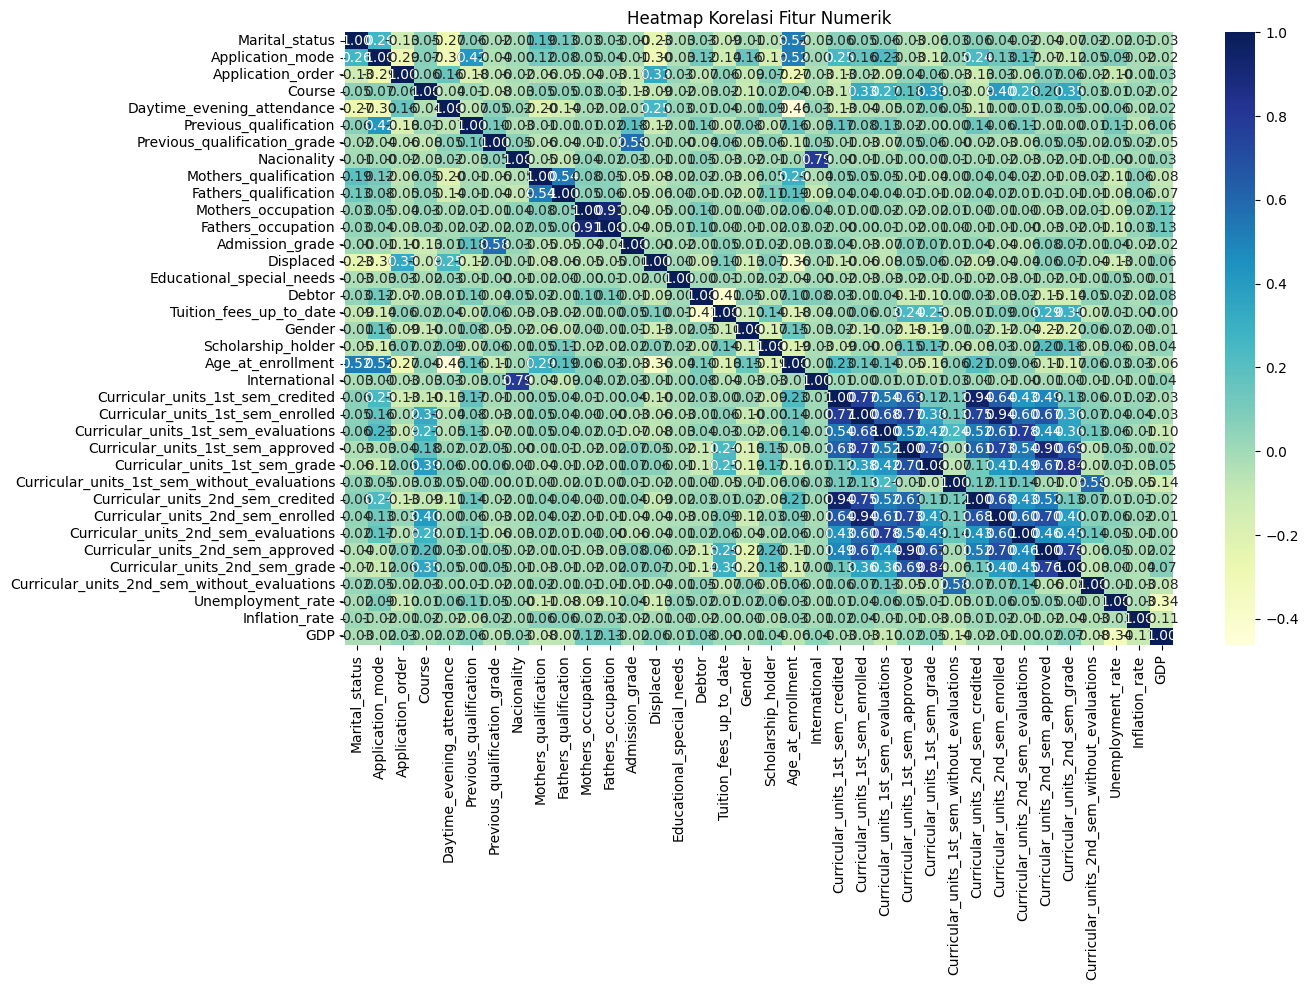

In [153]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(numeric_only=True), cmap='YlGnBu', annot=True, fmt=".2f")
plt.title("Heatmap Korelasi Fitur Numerik")
plt.tight_layout()
plt.show()


Insight: mendekati 1 artinya korelasi positif, sebaliknya mendekati -1 artinya korelasi negatif. Pada dataset ini, korelasi negatif maksimal berada di -0,4 dan secara dominan terlihat melalui penyebaran warna, rata2 hubungan korelasi antar fitur berada diantara 0 s.d. 0,2.

Perbandingan Status Berdasarkan Jenis Kelamin

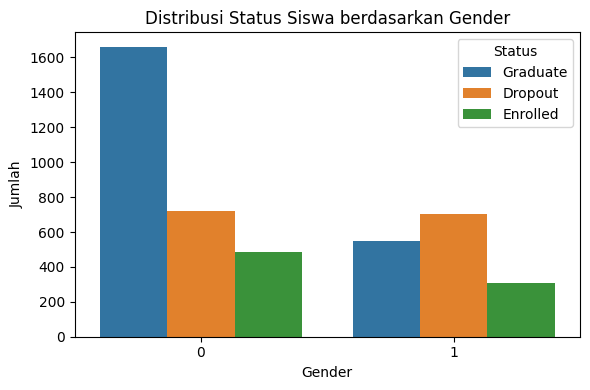

In [154]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Gender', hue='Status')
plt.title("Distribusi Status Siswa berdasarkan Gender")
plt.xlabel("Gender")
plt.ylabel("Jumlah")
plt.legend(title='Status')
plt.tight_layout()
plt.show()


Insight: 0 = perempuan dan sekitar 1600 siswa yang "Graduate" sedangkan 1 = laki-laki hanya sekitar 500 "graduate".

Visualisasi status siswa berdasarkan tingkat pendidikan Ibu

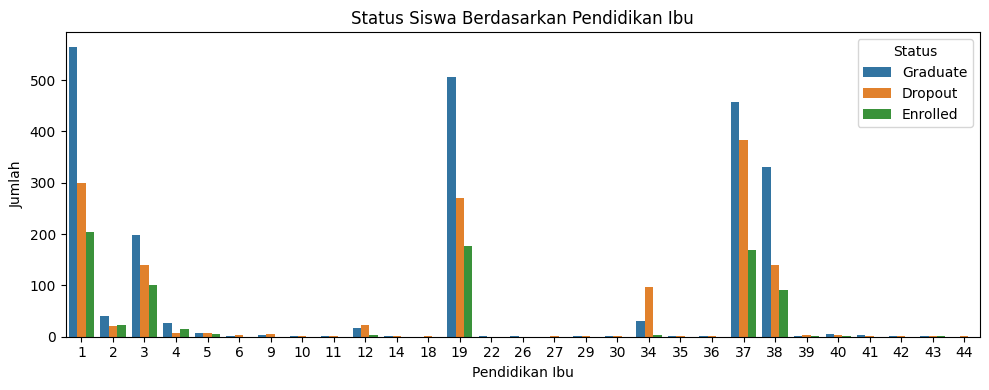

In [155]:
plt.figure(figsize=(10,4))
sns.countplot(data=df, x='Mothers_qualification', hue='Status')
plt.title("Status Siswa Berdasarkan Pendidikan Ibu")
plt.xlabel("Pendidikan Ibu")
plt.ylabel("Jumlah")
plt.legend(title='Status')
plt.tight_layout()
plt.show()


Insight: kualifikasi pendidikan Ibu siswa dominan berada pada kategori 1, 3, 19, 37 dan 38.



*   kategori 1 = Secondary Education - 12th Year of Schooling or Eq
*   kategori 3 = Higher Education - Degree
*   Kategori 19 = Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.
*   kategori 37 = Basic education 1st cycle (4th/5th year) or equiv.
*   kategori 38 = Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.

dengan masing-masing didominasi dengan status "graduated".







Visualisasi status siswa berdasarkan status pernikahan

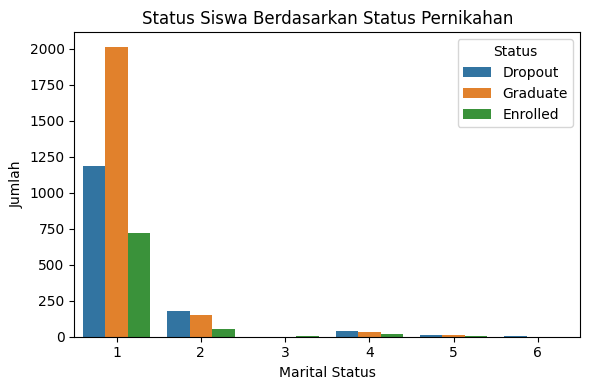

In [156]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Marital_status', hue='Status')
plt.title("Status Siswa Berdasarkan Status Pernikahan")
plt.xlabel("Marital Status")
plt.ylabel("Jumlah")
plt.legend(title='Status')
plt.tight_layout()
plt.show()


Insight: secara dominan pada semua label status, siswa memiliki marital status "single". Disusul dengan married.

# Data Preparation/Preprocessing

Melakukan konversi data kategorik

In [157]:
label_encoder = LabelEncoder()
df['Status'] = label_encoder.fit_transform(df['Status'])

In [158]:
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2


Insight: Insight: mengubah fitur targert "Status" menjadi numerik

Melakukan normalisasi

In [159]:
scaler = MinMaxScaler()

df[selected_features] = scaler.fit_transform(df[selected_features])

Insight: melakukan normalisasi untuk memastikan semua atribut dalam skala yang sama, mengurangi dominasi dari fitur yang memiliki nilai lebih besar.

Feature selection

In [160]:
chi2_selector = SelectKBest(score_func=chi2, k=20)
chi2_selector.fit(X_scaled, y)
chi2_features = X.columns[chi2_selector.get_support()].tolist()

f_selector = SelectKBest(score_func=f_classif, k=20)
f_selector.fit(X, y)
f_features = X.columns[f_selector.get_support()].tolist()

mi_selector = SelectKBest(score_func=mutual_info_classif, k=20)
mi_selector.fit(X, y)
mi_features = X.columns[mi_selector.get_support()].tolist()

rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)
rf_feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
rf_features = rf_feature_importances.nlargest(20).index.tolist()

all_features = {
    'Chi2': chi2_features,
    'F-test': f_features,
    'Mutual Info': mi_features,
    'Random Forest': rf_features
}

for method, features in all_features.items():
    print(f"\nTop 20 Features ({method}):\n", features)



Top 20 Features (Chi2):
 ['Application_mode', 'Admission_grade', 'Previous_qualification_grade', 'Tuition_fees_up_to_date', 'Debtor', 'Scholarship_holder', 'Gender', 'Age_at_enrollment', 'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade', 'Curricular_units_1st_sem_evaluations', 'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade', 'Curricular_units_2nd_sem_evaluations', 'Curricular_units_2nd_sem_enrolled', 'Mothers_occupation', 'Mothers_qualification', 'Course', 'Fathers_qualification', 'Curricular_units_1st_sem_enrolled']

Top 20 Features (F-test):
 ['Application_mode', 'Admission_grade', 'Previous_qualification_grade', 'Tuition_fees_up_to_date', 'Debtor', 'Scholarship_holder', 'Gender', 'Age_at_enrollment', 'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade', 'Curricular_units_1st_sem_evaluations', 'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade', 'Curricular_units_2nd_sem_evaluations', 'Curricular_units_2nd_

Insight: dasar dari penerapan tahap feature selection ini adalah dengan pertimbangan terhadap target prediksi "status" yang labelnya dropout, enrolled dan graduate. Sehingga banyak fitur lainnya yang tidak perlu digunakan dalam model

Splitting data

In [161]:
selected_features = [
    'Application_mode', 'Admission_grade', 'Previous_qualification_grade',
    'Tuition_fees_up_to_date', 'Debtor', 'Scholarship_holder', 'Gender',
    'Age_at_enrollment', 'Curricular_units_1st_sem_approved',
    'Curricular_units_1st_sem_grade', 'Curricular_units_1st_sem_evaluations',
    'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade',
    'Curricular_units_2nd_sem_evaluations', 'Curricular_units_2nd_sem_enrolled',
    'Mothers_occupation', 'Mothers_qualification', 'Course',
    'Fathers_qualification', 'Curricular_units_1st_sem_enrolled'
]

X = df[selected_features]
y = df['Status']

In [162]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

Insight: melakukan pembagian data jadi atribut dan target "status" dengan menyesuaikan dengan hasil feature selection. Juga sekaligus membagi data train 80% dan test 20%.

# Modeling

Modeling dengan XGboost

In [163]:
model = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=3,
    eval_metric='mlogloss',
    use_label_encoder=False,
    random_state=42
)
model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_class=3, num_parallel_tree=None, ...)

Insight: memanfaatkan XGboost dengan konfigurasi parameter default.

# Evaluation

Accuracy: 0.7649717514124293

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.76      0.78       284
           1       0.50      0.43      0.46       159
           2       0.82      0.89      0.85       442

    accuracy                           0.76       885
   macro avg       0.71      0.69      0.70       885
weighted avg       0.76      0.76      0.76       885



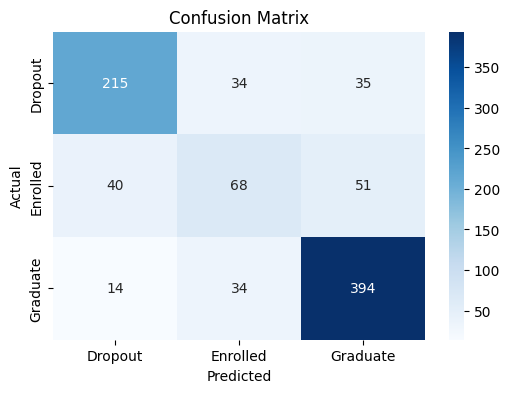

In [164]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Dropout', 'Enrolled', 'Graduate'],
            yticklabels=['Dropout', 'Enrolled', 'Graduate'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Insight: hasil akurasi model 76% akurasi antara prediksi dan aktual. Dari hasil confusion matriks, terlihat model secara signifikan dapat mengkategorikan dengan baik pada label graduate (394 berbanding 48) dan Dropout (215 berbanding 69), sedangkan kurang baik dalam hasil prediksi label enrolled.